## CSE330 Lab: Polynomial Interpolation using Newton's Divided Difference form
---

##Name :Wajida Anwar Asha
###ID :18101290
**Sec : 07**
##Name : Ariful Hoque
###ID : 17301107
**Sec : 07**
##Name : Wasema Nooren Islam
###ID : 15201017
**Sec : 07**


###1. Importing necessary libraries



In [1]:
import numpy as np
import matplotlib.pyplot as plt

###2. Writing the `Newtons_Divided_Differences` class.

Newton form of a $n$ degree polynomial:

$$p_n(x) = \sum_{k=0}^{n} a_kn_k(x)$$
where the basis,
$$n_k(x) = \prod_{j=0}^{k-1}(x-x_j)$$
$$ n_0(x)=1$$

and the coefficients, $$a_k = f[x_0, x_1, ..., x_k]$$

where the notation $f[x_0, x_1,...,x_k]$ denotes the divided difference.


Expanding the Newton form:

$$p(x) = f [x_0] + (x-x_0) f[x_0,x_1] + (x-x_0) (x-x_1) f[x_0,x_1,x_2] + . . . + (x-x_0) (x-x_1) . . . (x-x_{k-1}) f[x_0, x_1, . . ., x_k]$$



### Task: 
1. Complete the `calc_div_diff(x,y)` function which takes as input `x` and `y` and calculates all the divided differences. You may use the lambda function `difference` inside the `calc_div_diff(x,y)` function to calculate the divided differences.

2. Complete the `__call__` function which takes as input `x` and calculates `y` using all the difference coefficients. `x` can be a single value or a numpy. In this case it is a numpy array.



`res` variable must contain all the results (corresponding y for x) and returned.

In [2]:
class Newtons_Divided_Differences:
  def __init__(self, differences):
    self.differences = differences
    
  def __call__(self, x):
    """
    this function is for calculating y from given x using all the difference coefficients
    x can be a single value or a numpy
    the formula being used:
    f(x) = f [x0] + (x-x0) f[x0,x1] + (x-x0) (x-x1) f[x0,x1,x2] + . . . + (x-x0) (x-x1) . . . (x-xk-1) f[x0, x1, . . ., xk]
    
    work on this after implementing 'calc_div_diff'. Then you should have
    f[x0], f[x0,x1]. . . . . ., f[x0, x1, . . ., xk] stored in self.differences

    'res' variable must return all the results (corresponding y for x)
    """
    
    res = np.zeros(len(x)) #Initialization to avoid runtime error. You can change this line if you wish
    
    for i in range(len(x)):
      func=data_y[0]
      for j in range(len(differences)):
        abc=1
        for k in range(0,len(data_x)):
          abc=abc*(x[i]-data_x[k])
        func=func+(differences[j]*abc)
      res[i]=func

    return res


In [3]:
# basic rule for calculating the difference, implanted in the lambda function. 
# You may use it if you wish
difference = lambda y2, y1, x2, x1: (y2-y1)/(x2-x1)


def calc_div_diff(x,y):
  assert(len(x)==len(y))
  #write this function to calculate all the divided differences in the list 'b'
  n=len(x)
  b=[]
  fdd=[[0 for i in range(7)]  
        for j in range(7)]
  for i in range(len(x)):
    fdd[i][0]=y[i]
  for i in range(1, n):  
        for j in range(n - i):  
            fdd[j][i] = ((fdd[j+1][i - 1] - fdd[j ][i - 1]) / (x[i+j] - x[ j]));
    
  for i in range(n):
    b.append(fdd[i][0])     
  return b

###3. Creating and plotting the polynomial

* `data_x` and `data_y` are the coordinates of the given nodes.

* `differences` is a list which contains the divided differences as each of its elements: $f[x_0], f[x_0,x_1], f[x_0,x_1,x_2], ...$

* `obj` is an object of type `Newtons_Divided_Differences`. Creating the object runs the constructor of the class where the `difference` are stored in `self.differences`.

* `X` contains $x_i$ values through which we want to plot our polynomial.

* Calling the object using `obj(X)` executes the `__call__` function of the class which returns a numpy array containing the corresponding $y_i$ values, and storing them in variable `F`.

* Using `plt.plot(X,F)` we plot the $(x_i, y_i)$ pairs of the polynomial.

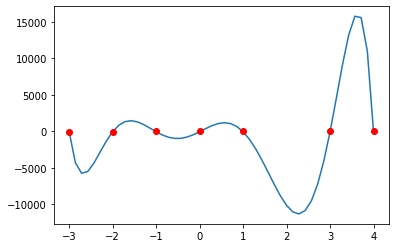

In [5]:
data_x = np.array([-3.,-2.,-1.,0.,1.,3.,4.])
data_y = np.array([-60.,-80.,6.,1.,45.,30.,16.])
differences = calc_div_diff(list(data_x), list(data_y))
obj = Newtons_Divided_Differences(list(differences))

#generating 50 points from -3 to 4 in order to create a smooth line
X = np.linspace(-3, 4, 50, endpoint=True)
F = obj(X)
plt.plot(X,F)
plt.plot(data_x, data_y, 'ro')
plt.show()